In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import multi_dot

In [2]:
sz = np.array([[1,0],[0,-1]])
sp = np.array([[0,1],[0,0]])
sm = np.array([[0,0],[1,0]])

Quantum Master equation for a two-level atom in a thermal reservoir:
$$\frac{d \rho}{dt}=\mathcal{L}\rho,$$
where
$$\mathcal{L}\rho =-\imath[H_s,\rho]+\gamma(\langle n \rangle +1)\left(\sigma_-\rho\sigma_++\frac{1}{2}\left\{\sigma_+\sigma_-,\rho\right\}\right)+\gamma\langle n \rangle\left(\sigma_+\rho\sigma_-+\frac{1}{2}\left\{\sigma_-\sigma_+,\rho\right\}\right)$$
and
$$
H_s = \frac{\omega_0}{2}\sigma_z
$$

$$
\langle n \rangle=\frac{1}{e^{\hbar\omega_0/kT}-1}
$$

In [3]:
def LinEm(x, omega0=10, nth=2, gamma = 0.1):
    res = -1j*(omega0/2)*(np.dot(sz,x)-np.dot(x,sz))
    res += gamma*(nth+1)*(multi_dot([sm,x,sp])-0.5*multi_dot([sp,sm,x])-0.5*multi_dot([x,sp,sm]))
    res +=     gamma*nth*(multi_dot([sp,x,sm])-0.5*multi_dot([sm,sp,x])-0.5*multi_dot([x,sm,sp]))    
    return res

$$\frac{dy}{dt} = f(t, y), \quad y(t_0) = y_0$$
Runge-Kutta methods 4th order step (from wiki - https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods):
$$y_{n+1} = y_n + \frac{1}{6}h\left(k_1 + 2k_2 + 2k_3 + k_4 \right),$$
$$t_{n+1} = t_n +h,$$
where:
$$k_1 =  f(t_n, y_n),$$
$$k_2 =  f\left(t_n + \frac{h}{2}, y_n + h\frac{k_1}{2}\right),$$
$$k_3 =  f\left(t_n + \frac{h}{2}, y_n + h\frac{k_2}{2}\right),$$
$$k_4 =  f\left(t_n + h, y_n + hk_3\right).$$

In [4]:
def RK4step(x, h):
    k1 = LinEm(x)
    k2 = LinEm(x+h*k1/2)
    k3 = LinEm(x+h*k2/2)
    k4 = LinEm(x+h*k3)
    return x+(h/6)*(k1+2*k2+2*k3+k4)

The initial condition:
$$\rho(0)=|+\rangle\langle +|,$$
where 
$$|+\rangle=\frac{1}{\sqrt{2}}\left(\begin{matrix}
1\\
1
\end{matrix}\right)$$

In [5]:
init = np.array([[0.5,0.5],[0.5,0.5]], dtype=complex)

t_i = 0
t_f = 20
nsteps = 500

h = (t_f-t_i)/nsteps

solRK = np.zeros((nsteps+1,2,2),dtype=complex)
solRK[0]=init

for step in range(1,solRK.shape[0]):
    solRK[step] = RK4step(solRK[step-1],h)

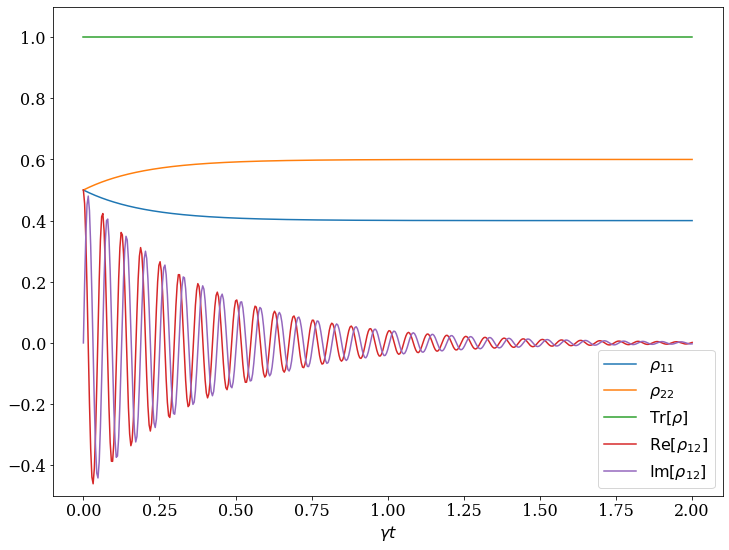

In [6]:
import matplotlib
%matplotlib inline
matplotlib.rcParams.update({'font.size': 16,'font.family':'serif'})
fig, ax = plt.subplots(figsize=(12, 9))

trange = 0.1*np.linspace(t_i,t_f,nsteps+1)
plt.plot(trange,np.real(solRK[:,0,0]), label = r'$\rho_{11}$')
plt.plot(trange,np.real(solRK[:,1,1]), label = r'$\rho_{22}$')
plt.plot(trange,np.real(solRK[:,1,1]+solRK[:,0,0]), label = r'$\mathrm{Tr}[\rho]$')
plt.plot(trange,np.real(solRK[:,1,0]), label = r'$\mathrm{Re}[\rho_{12}]$')
plt.plot(trange,np.imag(solRK[:,1,0]), label = r'$\mathrm{Im}[\rho_{12}]$')

plt.xlabel('$\gamma t$')
plt.ylim(-0.5, 1.1)
plt.legend(loc = "best",numpoints=1,frameon=True)

plt.show()

Another approach to solving the same QME (only if $\mathcal{L}$ is time independent):
$$\frac{d \rho}{dt}=\mathcal{L}\rho,$$
formal solution - 
$$\rho(t)=e^{t\mathcal{L}}\rho(0)=\sum_{n=0}^\infty\frac{t^n}{n!}\mathcal{L}^n\rho(0).$$
For a small $h$ one can use the following approximation:
$$
\rho(t+h)=e^{h\mathcal{L}}\rho(t)\approx\sum_{n=0}^M\frac{h^n}{n!}\mathcal{L}^n\rho(t)+\mathcal{O}(h^{M+1})
$$

In [8]:
def Expstep(x, h, M=4):
    res   = x
    xtemp = x.copy()
    for step in range(1,M+1):
        xrec  = (h/step)*LinEm(xtemp)
        res += xrec
        xtemp = xrec.copy()
    return res

In [9]:
init = np.array([[0.5,0.5],[0.5,0.5]], dtype=complex)

t_i = 0
t_f = 20
nsteps = 500

h = (t_f-t_i)/nsteps

solExp = np.zeros((nsteps+1,2,2),dtype=complex)
solExp[0]=init

for step in range(1,solExp.shape[0]):
    solExp[step] = Expstep(solExp[step-1],h)

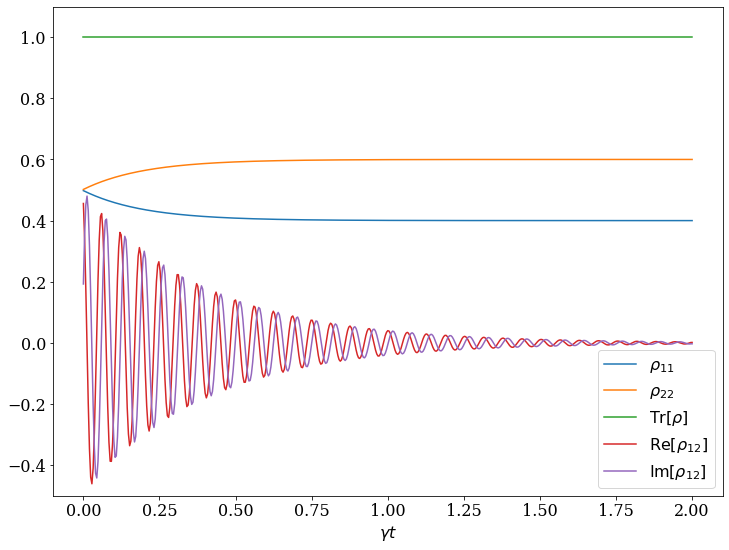

In [10]:
import matplotlib
%matplotlib inline
matplotlib.rcParams.update({'font.size': 16,'font.family':'serif'})
fig, ax = plt.subplots(figsize=(12, 9))

trange = 0.1*np.linspace(t_i,t_f,nsteps+1)
plt.plot(trange,np.real(solExp[:,0,0]), label = r'$\rho_{11}$')
plt.plot(trange,np.real(solExp[:,1,1]), label = r'$\rho_{22}$')
plt.plot(trange,np.real(solExp[:,1,1]+solExp[:,0,0]), label = r'$\mathrm{Tr}[\rho]$')
plt.plot(trange,np.real(solExp[:,1,0]), label = r'$\mathrm{Re}[\rho_{12}]$')
plt.plot(trange,np.imag(solExp[:,1,0]), label = r'$\mathrm{Im}[\rho_{12}]$')

plt.xlabel('$\gamma t$')
plt.ylim(-0.5, 1.1)
plt.legend(loc = "best",numpoints=1,frameon=True)

plt.show()

Now let us use SciPy integrator. To do it we need a vectorized form of Quantum Master Equation
$$
\rho(t) = \left(\begin{matrix}
\rho_{11} & \rho_{12}\\
\rho_{21} & \rho_{22}
\end{matrix}\right)\rightarrow \left(\begin{matrix}
\rho_{11}\\
\rho_{12}\\
\rho_{21}\\
\rho_{22}
\end{matrix}\right)$$


It is straightforward to see that:
$$
\begin{cases} \rho_{11}'= -\gamma(\langle n \rangle +1)\rho_{11}+\gamma\langle n \rangle \rho_{22}\\
\rho_{12}'= -\frac{\gamma}{2}(2\langle n \rangle +1)\rho_{12}-\imath\omega_0\rho_{12}\\ \rho_{21}'= -\frac{\gamma}{2}(2\langle n \rangle +1)\rho_{21}+\imath\omega_0\rho_{21}\\ \rho_{22}'= -\gamma \langle n \rangle \rho_{22}+\gamma(\langle n \rangle +1)\rho_{11}\end{cases} 
$$

In [11]:
import scipy.integrate

def func(t,y, omega0=10, nth=2, gamma = 0.1):
    r11, r12, r21, r22 = y
    d11 = -gamma*(nth+1)*r11+gamma*nth*r22
    d22 =  gamma*(nth+1)*r11-gamma*nth*r22
    d12 = -(gamma/2)*(2*nth+1)*r12-1j*omega0*r12
    d21 = -(gamma/2)*(2*nth+1)*r21+1j*omega0*r21
    return(np.array([d11,d12,d21,d22], dtype=complex))

In [12]:
t_i = 0
t_f = 20
nsteps = 500

h = (t_f-t_i)/nsteps

r0_11 = init[0,0]
r0_12 = init[1,0]
r0_21 = init[0,1]
r0_22 = init[1,1]

r0=np.array([r0_11,r0_12,r0_21,r0_22],dtype=complex)
t_span=(t_i,t_f)
solSciPy=scipy.integrate.solve_ivp(func,t_span,r0,dense_output=True)

In [13]:
tvec=np.linspace(t_i,t_f,nsteps+1)
r11, r12, r21, r22 = solSciPy.sol(tvec)

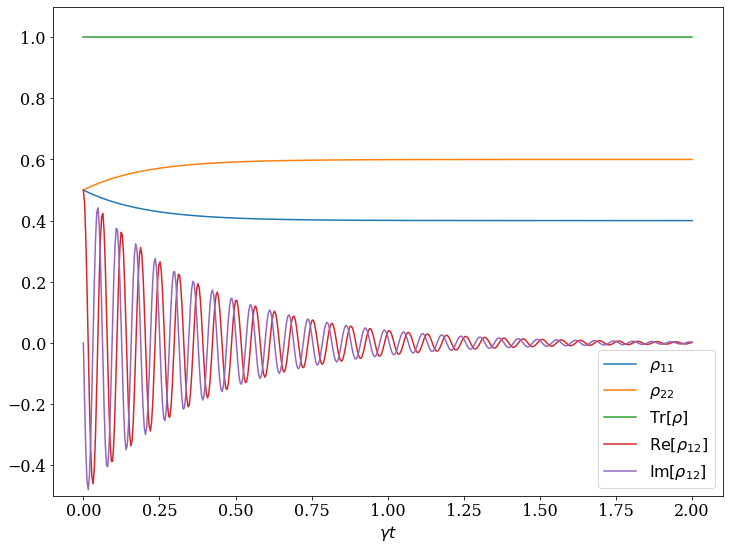

In [14]:
import matplotlib
%matplotlib inline
matplotlib.rcParams.update({'font.size': 16,'font.family':'serif'})
fig, ax = plt.subplots(figsize=(12, 9))

trange = 0.1*np.linspace(t_i,t_f,nsteps+1)
plt.plot(trange,np.real(r11[:]), label = r'$\rho_{11}$')
plt.plot(trange,np.real(r22[:]), label = r'$\rho_{22}$')
plt.plot(trange,np.real(r11[:]+r22[:]), label = r'$\mathrm{Tr}[\rho]$')
plt.plot(trange,np.real(r12[:]), label = r'$\mathrm{Re}[\rho_{12}]$')
plt.plot(trange,np.imag(r12[:]), label = r'$\mathrm{Im}[\rho_{12}]$')

plt.xlabel('$\gamma t$')
plt.ylim(-0.5, 1.1)
plt.legend(loc = "best",numpoints=1,frameon=True)

plt.show()

We can rewrite the density matrix of 2-level system as:
$$
\rho(t)=\frac{1}{2}\left(1+\vec{R}(t)\vec{\sigma}\right),
$$
where
$$
\vec{\sigma}=(\sigma_x,\sigma_y,\sigma_z)
$$
and
$$
\vec{R}= (X,Y,Z)\quad A = \mathrm{Tr}(\sigma_A\rho(t)).
$$

One can rewrite QME as follows:
$$
\begin{cases} Z'= -\gamma(2\langle n \rangle +1)Z-\gamma\\
X'=-\frac{\gamma}{2}(2\langle n \rangle +1)X-\omega_0 Y \\
Y'=-\frac{\gamma}{2}(2\langle n \rangle +1)Y+\omega_0 X \end{cases} 
$$

In [15]:
def funcO(t,y, omega0=10, nth=2, gamma = 0.1):
    X, Y, Z = y
    dz =  -gamma*(1+2*nth)*Z-gamma
    dx = -(gamma/2)*(1+2*nth)*X-omega0*Y
    dy = -(gamma/2)*(1+2*nth)*Y+omega0*X    
    return(np.array([dx, dy, dz], dtype=float))

In [16]:
t_i = 0
t_f = 20
nsteps = 500

h = (t_f-t_i)/nsteps

X0 = 1.0
Y0 = 0.0
Z0 = 0.0

R0=np.array([X0,Y0,Z0],dtype=float)
t_span=(t_i,t_f)
solSciPyO=scipy.integrate.solve_ivp(funcO,t_span,R0,dense_output=True)

In [17]:
tvec=np.linspace(t_i,t_f,nsteps+1)
Xt, Yt, Zt = solSciPyO.sol(tvec)

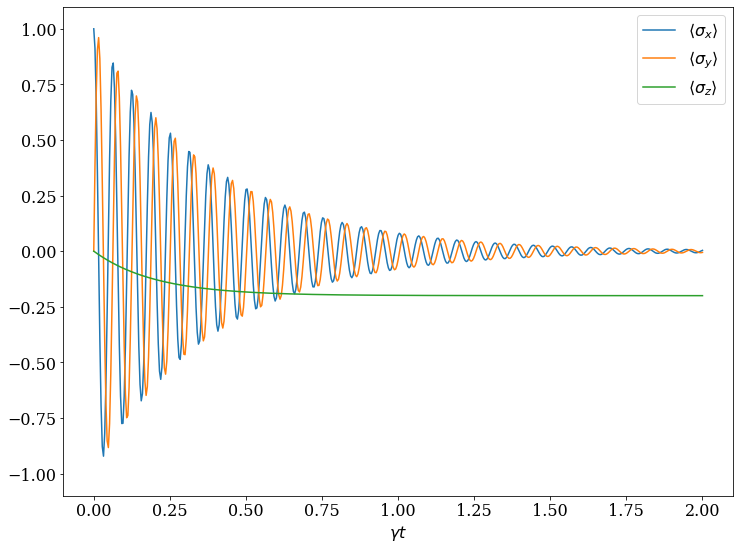

In [18]:
import matplotlib
%matplotlib inline
matplotlib.rcParams.update({'font.size': 16,'font.family':'serif'})
fig, ax = plt.subplots(figsize=(12, 9))

trange = 0.1*np.linspace(t_i,t_f,nsteps+1)
plt.plot(trange,np.real(Xt), label = r'$\langle \sigma_x \rangle$')
plt.plot(trange,np.real(Yt), label = r'$\langle \sigma_y \rangle$')
plt.plot(trange,np.real(Zt), label = r'$\langle \sigma_z \rangle$')

plt.xlabel('$\gamma t$')
plt.ylim(-1.1, 1.1)
plt.legend(loc = "best",numpoints=1,frameon=True)

plt.show()

Problem:
Consider a Quantum Master equation for a weakly driven two-level atom in a zero temperature reservoir:
$$\frac{d \rho}{dt}=\mathcal{L}\rho,$$
where
$$\mathcal{L}\rho =-\imath[H_s,\rho]+\gamma\left(\sigma_-\rho\sigma_++\frac{1}{2}\left\{\sigma_+\sigma_-,\rho\right\}\right)$$
and
$$
H_s = \frac{\Delta}{2}\sigma_z+ \Omega \sigma_x,
$$
where $\Delta = \omega_0-\omega_D$ and $\Omega$ is the amplitude of the driving field.


1. Adopt all versions of the codes for the new QME (choose different values of parameters - $\Delta, \Omega, \gamma$)
2. Find the corresponding equations for the observables $X,Y,Z$ and solve the differential equations using SciPy.
3. Find analytically steady state solutions for the observables ($t\rightarrow \infty$)